In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn 
seaborn.set_context('talk')
import plotly
plotly.__version__
# Make sure it's 4.14.3
melb_df = pandas.read_csv(
    'https://raw.githubusercontent.com/FernandoGuillermo/TrabajosPracticos/main/Analisis%20exploratorio%20y%20curacion%20de%20datos/Dataset/melb_data.csv')
melb_df[:3]
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://raw.githubusercontent.com/FernandoGuillermo/TrabajosPracticos/main/Analisis%20exploratorio%20y%20curacion%20de%20datos/Dataset/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

C:\Users\ferna\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


1- Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [3]:
melb_df['Price'].describe().round()

count      13580.0
mean     1075684.0
std       639311.0
min        85000.0
25%       650000.0
50%       903000.0
75%      1330000.0
max      9000000.0
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price'>

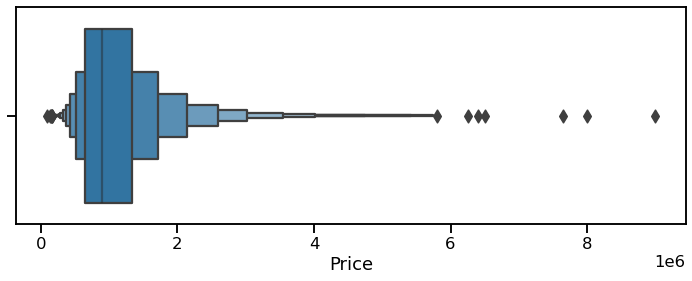

In [4]:

plt.figure(figsize=(12, 4))
seaborn.boxenplot(x=melb_df["Price"])

In [5]:
melb_df["Price"].quantile([.95, .98, .99, .995, .998])

0.950    2290050.0
0.980    2865360.0
0.990    3338150.0
0.995    3900000.0
0.998    4747630.0
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price'>

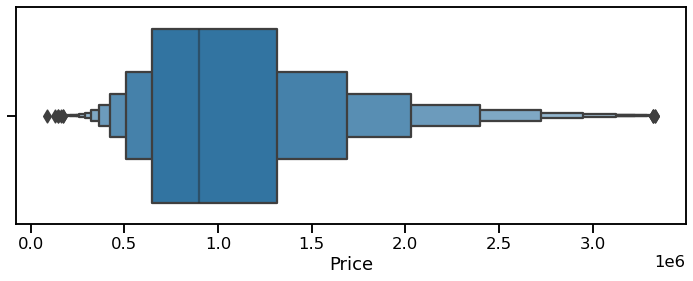

In [6]:
plt.figure(figsize=(12, 4))
max_limit = melb_df["Price"].quantile(.99)
seaborn.boxenplot(x=melb_df[melb_df["Price"] < max_limit]["Price"])

In [7]:
melb_df_fil=melb_df[melb_df["Price"] < melb_df["Price"].quantile(0.99)]




<AxesSubplot:xlabel='Price'>

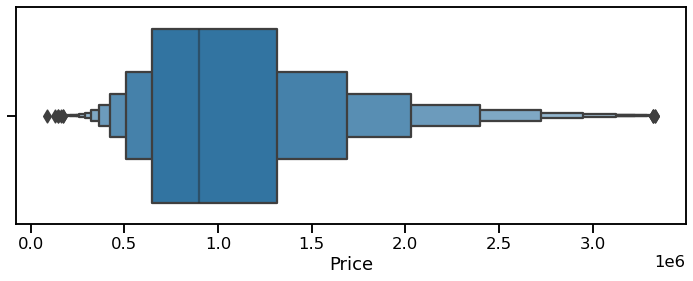

In [8]:
plt.figure(figsize=(12, 4))

seaborn.boxenplot(x=melb_df_fil["Price"])

2. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
3. Justificar cada columna no seleccionada

<AxesSubplot:xlabel='Suburb', ylabel='Count'>

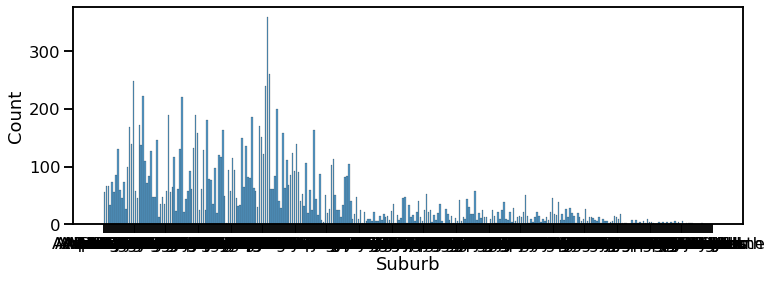

In [9]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Suburb", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Rooms', ylabel='Count'>

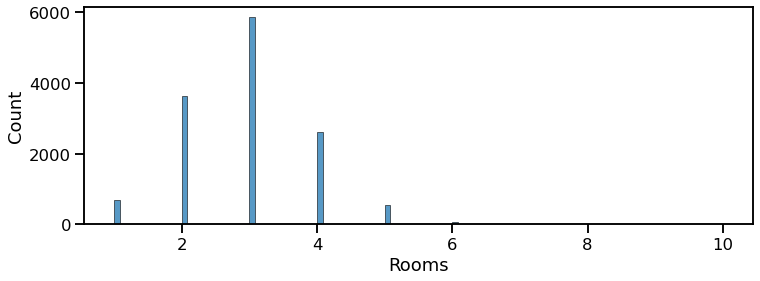

In [10]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Rooms")

<AxesSubplot:xlabel='Type', ylabel='Count'>

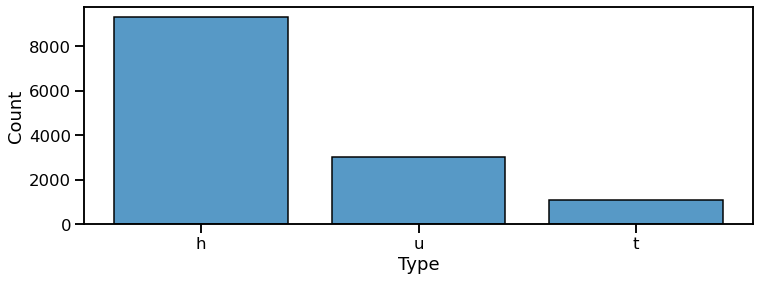

In [11]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Type", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Price', ylabel='Count'>

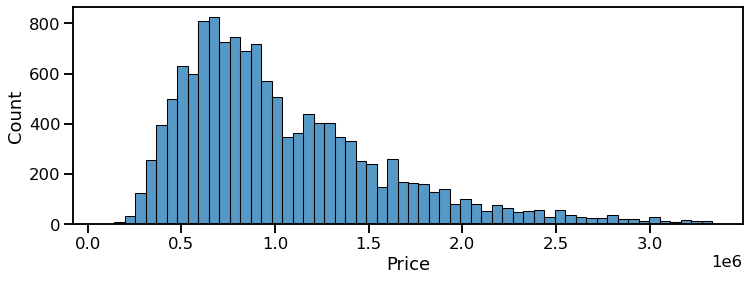

In [12]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Price")

<AxesSubplot:xlabel='Method', ylabel='Count'>

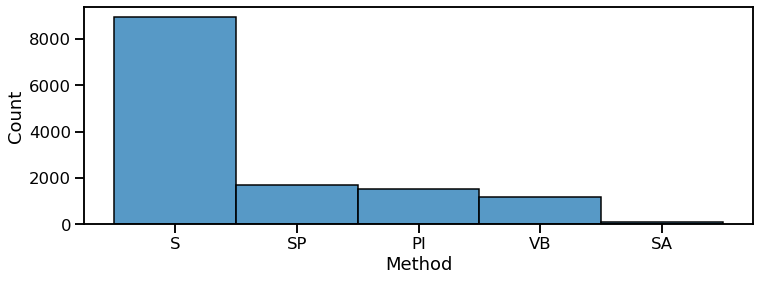

In [13]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Method")

<AxesSubplot:xlabel='SellerG', ylabel='Count'>

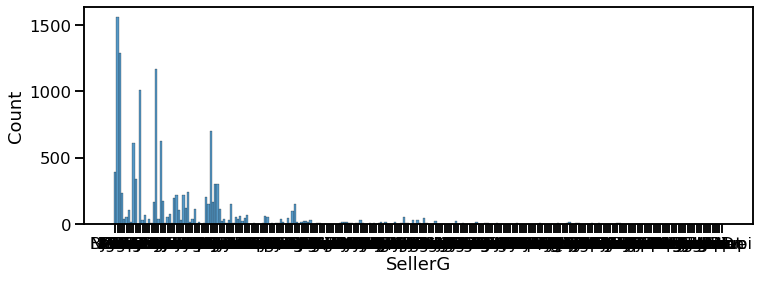

In [14]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="SellerG")

In [15]:
melb_df_fil['date'] = pandas.to_datetime(melb_df_fil.Date)

<ipython-input-15-758893a44163>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df_fil['date'] = pandas.to_datetime(melb_df_fil.Date)


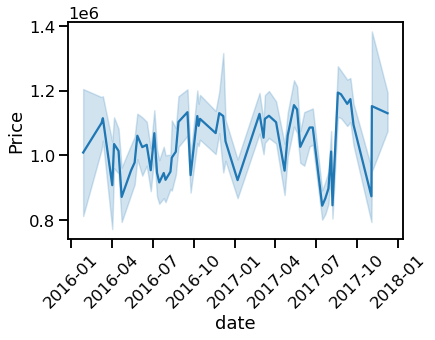

In [16]:
seaborn.lineplot(data=melb_df_fil, x='date', y='Price')
plt.xticks(rotation=45);

In [17]:
melb_df_fil['date_month'] = pandas.to_datetime(melb_df_fil.date.dt.strftime('%Y-%m'))

<ipython-input-17-c39445e65bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df_fil['date_month'] = pandas.to_datetime(melb_df_fil.date.dt.strftime('%Y-%m'))


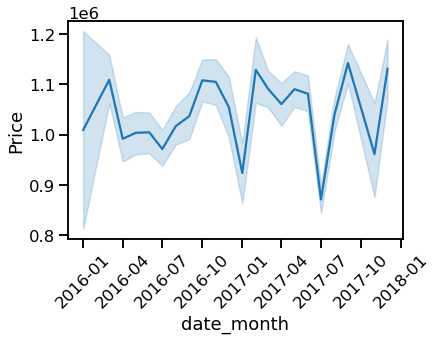

In [18]:
seaborn.lineplot(data=melb_df_fil, x='date_month', y='Price')
plt.xticks(rotation=45);

<AxesSubplot:xlabel='Distance', ylabel='Count'>

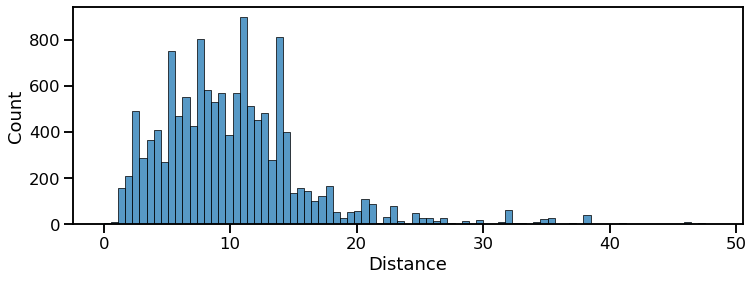

In [19]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Distance")

<AxesSubplot:xlabel='Postcode', ylabel='Count'>

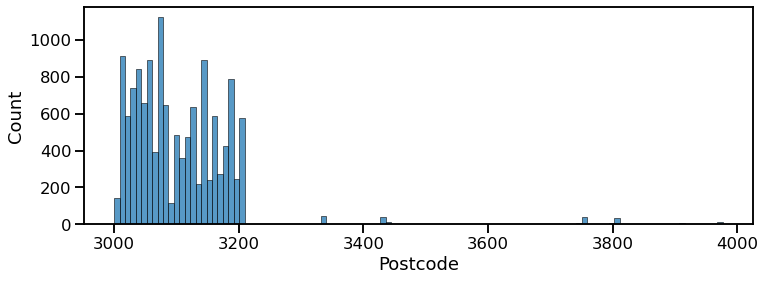

In [20]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Postcode")

<AxesSubplot:xlabel='Bedroom2', ylabel='Count'>

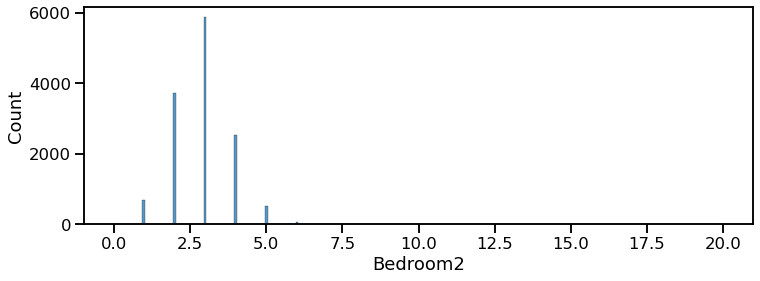

In [21]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Bedroom2")

<AxesSubplot:xlabel='Bathroom', ylabel='Count'>

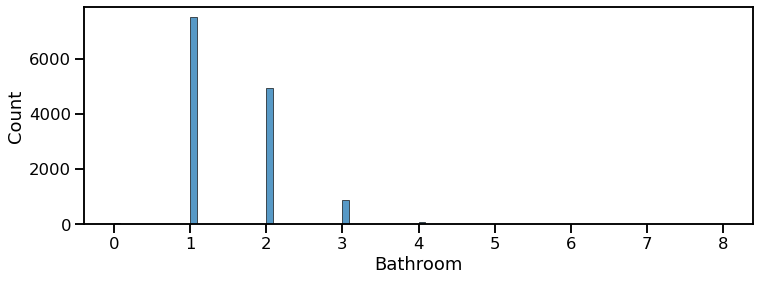

In [22]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Bathroom")

<AxesSubplot:xlabel='Car', ylabel='Count'>

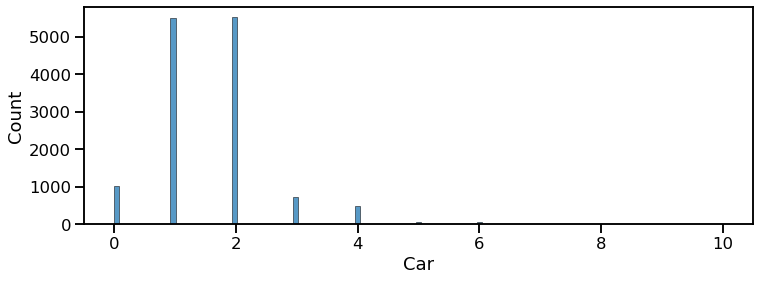

In [23]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Car")

<AxesSubplot:xlabel='Landsize', ylabel='Count'>

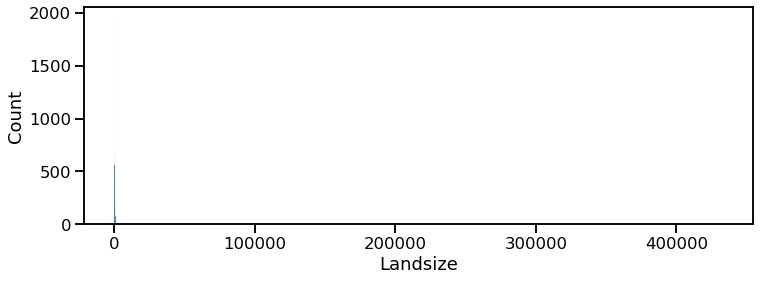

In [24]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Landsize")

<AxesSubplot:xlabel='BuildingArea', ylabel='Count'>

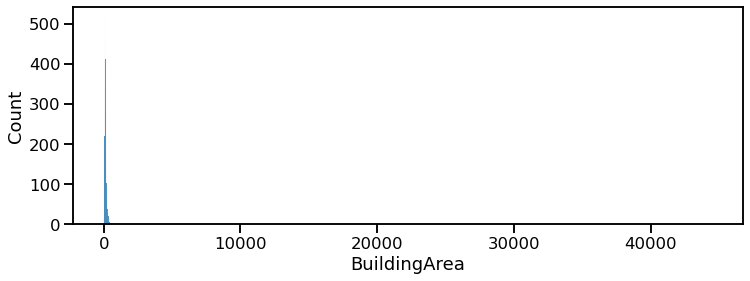

In [25]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="BuildingArea")

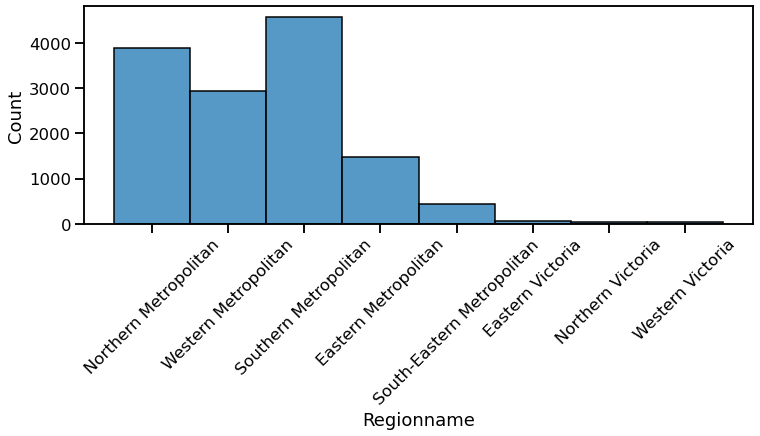

In [26]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Regionname")
plt.xticks(rotation=45);

<AxesSubplot:xlabel='Propertycount', ylabel='Count'>

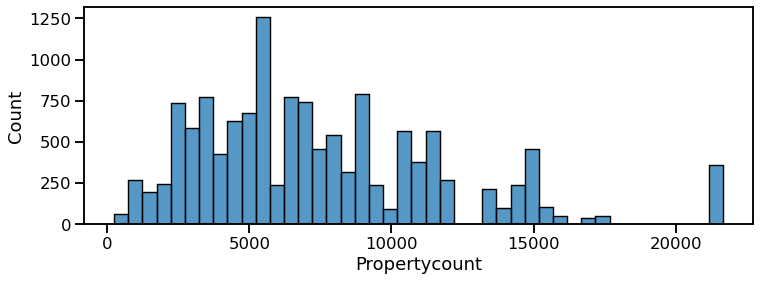

In [27]:
plt.figure(figsize=(12, 4))
seaborn.histplot(data=melb_df_fil, x="Propertycount")

Investigación de datos faltantes, valores 0 y NAN

In [28]:
cols = melb_df_fil[melb_df_fil == 0].count(axis=0)
cols[cols > 0]


Unnamed: 0         1
Distance           6
Bedroom2          16
Bathroom          34
Car             1023
Landsize        1937
BuildingArea      16
dtype: int64

Cómo puede ser que no exista dormitorios?, Pues son casos de monoambiente.

<AxesSubplot:xlabel='Bedroom2', ylabel='Type'>

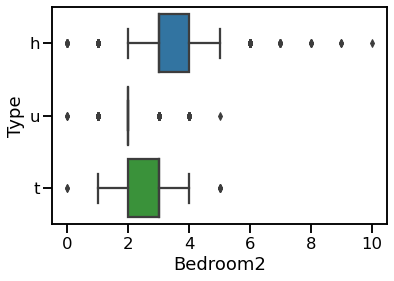

In [29]:
seaborn.boxplot(data=melb_df_fil[melb_df_fil.Bedroom2<20], x='Bedroom2', y='Type')


In [30]:
Bedroom2 = melb_df_fil.Bedroom2
Rooms = melb_df_fil.Rooms
pandas.crosstab(Bedroom2,Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.0,0,5,8,3,0,0,0,0,0
1.0,663,21,5,2,0,0,0,0,0
2.0,16,3536,161,19,1,0,0,0,0
3.0,2,73,5609,173,17,1,0,0,0
4.0,0,8,71,2413,35,4,0,1,0
5.0,0,1,5,15,494,1,2,0,0
6.0,0,0,0,0,2,56,0,2,0
7.0,0,0,0,0,1,1,7,0,0
8.0,0,0,0,0,1,0,0,4,0


Se observa que la variable room explica mejor los datos que Bedroom2

In [31]:

melb_df_fil.loc[melb_df_fil.Bathroom<1,'Bathroom']=1

C:\Users\ferna\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Las propiedades en donde la cantidad de baños es cero, se le asigna que al menos tengan uno.

In [32]:
cols = melb_df_fil[melb_df_fil == 0].count(axis=0)
cols[cols > 0]

Unnamed: 0         1
Distance           6
Bedroom2          16
Car             1023
Landsize        1937
BuildingArea      16
dtype: int64

In [33]:
melb_df_fil.dtypes

Unnamed: 0                int64
Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date                     object
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
date             datetime64[ns]
date_month       datetime64[ns]
dtype: object

Elimino: 
1.Unnamed :0 por columna duplicada. Adress, Lattitud, Longittude y councilArea elimino porque me creo que se puede segmentar lo precios de las propiedades geográgicamente a través de zipcode, suburb, Regionname. A "date" lo cambio por "date_month".Method y SellerG, no necesitaríamos saber qué agente realizó y la forma que es trasmitida la propiedad en este caso. 

In [34]:
melb_df_fil2=melb_df_fil[["Suburb","Rooms","Type","Price","Postcode","Bathroom","Distance",
  "Landsize","BuildingArea","YearBuilt","Regionname","Propertycount","date_month"]]

In [35]:
freq= melb_df_fil2["Suburb"].value_counts()

Se puede observar las frecuencias "freq" de las categorías de  la columna Suburb con valor igual a uno, queda pendiente crear categoría "otros" con con el conjundo de categorías igual a 1.


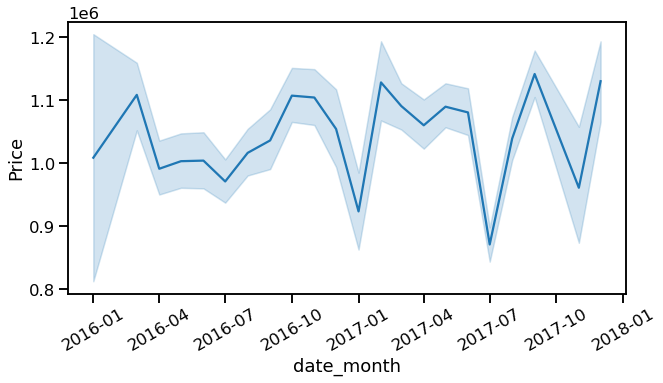

In [36]:
fig = plt.figure(figsize=(10, 5))
seaborn.lineplot(data=melb_df_fil2.sort_values('date_month'), x='date_month', y='Price')
plt.xticks(rotation=30);

Trabajo sobre el dataset airbnb_df.

In [37]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

Se analiza la suficiancia de registros en común entre ambos dataset.

In [41]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb_df_fil2.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df_fil2.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


In [42]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df_fil2.Postcode.isin(intersection).sum() / len(melb_df_fil2))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      airbnb_df.zipcode.isin(intersection).sum() / len(airbnb_df))

Records in Sales df with corresponding zipcode form Airbnb df 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df 0.9302904564315353


In [45]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']

In [50]:
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg(airbnb_record_count=('price', 'count'),
   airbnb_price_mean=('price', 'mean'),
   airbnb_weekly_price_mean=('weekly_price', 'mean'),
   airbnb_monthly_price_mean=('monthly_price', 'mean'))\
   .reset_index()
  

In [53]:
merged_df = melb_df_fil2.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_df.sample(5)

,Suburb,Rooms,Type,Price,Postcode,Bathroom,Distance,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,date_month,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
11415,Watsonia North,3,h,740000.0,3087.0,1.0,14.5,909.0,NaN,NaN,Northern Metropolitan,1442.0,2017-07-01,3087.0,3.0,77.000000,NaN,NaN
10507,Caulfield South,2,u,636500.0,3162.0,1.0,8.7,0.0,NaN,1970.0,Southern Metropolitan,5051.0,2017-08-01,3162.0,81.0,130.111111,1192.000000,4314.416667
7748,Fitzroy North,2,h,1200000.0,3068.0,1.0,3.5,204.0,NaN,NaN,Northern Metropolitan,6244.0,2017-06-01,3068.0,308.0,126.012987,801.315789,2801.842105
5950,Sunshine North,5,h,605000.0,3020.0,2.0,13.3,661.0,133.0,1960.0,Western Metropolitan,4217.0,2016-10-01,3020.0,45.0,69.555556,160.000000,600.000000
12271,South Melbourne,2,h,1137000.0,3205.0,1.0,1.9,126.0,79.0,NaN,Southern Metropolitan,5943.0,2017-03-01,3205.0,300.0,214.846667,1226.024390,4125.225806


In [55]:
merged_df.to_csv('merged_entregable1.csv')

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.

 

In [57]:
merged_df["CouncilArea"]=melb_df.filter(items=["CouncilArea"])

<AxesSubplot:>

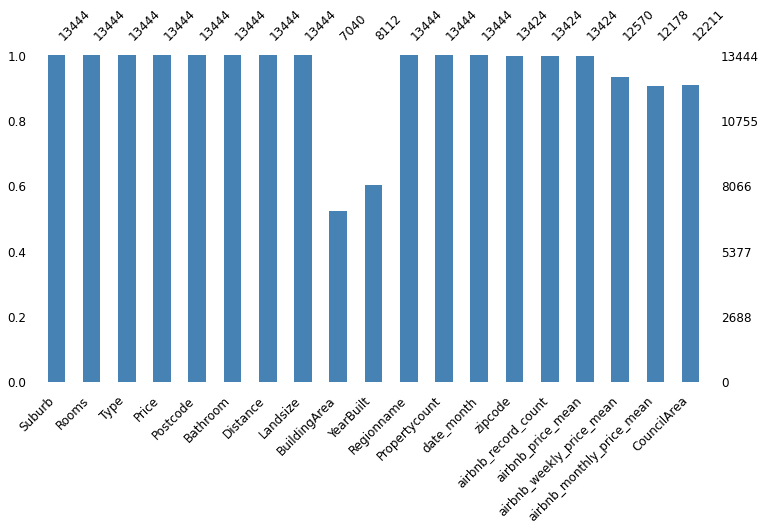

In [58]:
import missingno as msno
msno.bar(merged_df,figsize=(12, 6), fontsize=12, color='steelblue')

In [65]:
merged_df_final=merged_df.copy()

In [78]:
#creo listas con las variables categoricas por un lado y numéricas por otro para imputar
cat=["CouncilArea"]
num=["airbnb_record_count","airbnb_price_mean","airbnb_weekly_price_mean","airbnb_monthly_price_mean"]


In [79]:
# Se imputan con la media los datos numéricoss
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

merged_df_final[num] = mean_imputer.fit_transform(merged_df_final[num])

In [81]:
#Se imputa con la moda variable categórica
from sklearn.impute import SimpleImputer

most_frequent_imputer = SimpleImputer(strategy='most_frequent')

merged_df_final[cat] = most_frequent_imputer.fit_transform(merged_df_final[cat])



<AxesSubplot:>

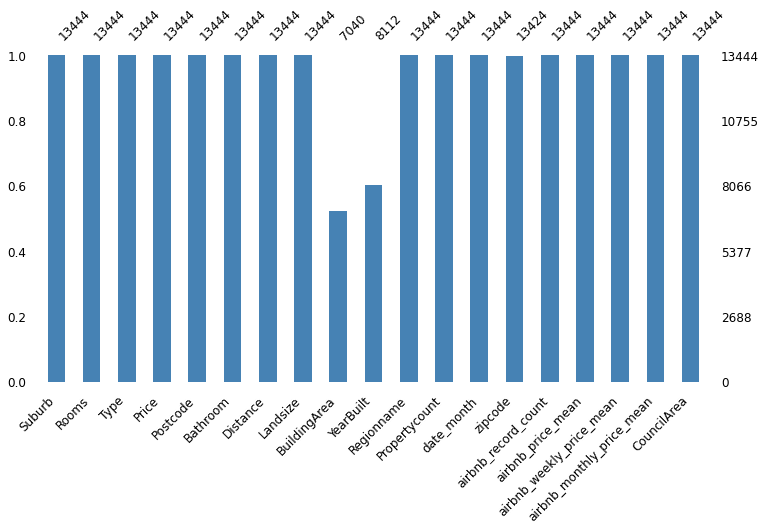

In [82]:
msno.bar(merged_df_final,figsize=(12, 6), fontsize=12, color='steelblue')

In [83]:
merged_df_final.to_csv('merged_final.csv', index=False)